In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class MLP:

    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        self.b01 = np.random.uniform(size=(1, num_hidden))
        self.b12 = np.random.uniform(size=(1, num_output))

        self.losses = []

    def update_weights(self):
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))
        error_term = (self.target - self.output_final) # error term

        grad01 = self.train_data.T @ (((error_term * self.delsigmoid(self.output_final)) * self.weights_12.T) * self.delsigmoid(self.hidden_out))
        grad12 = self.hidden_out.T @ (error_term * self.delsigmoid(self.output_final))

        self.weights_01 += self.lr * grad01
        self.weights_12 += self.lr * grad12

        self.b01 += np.sum(self.lr * ((error_term * self.delsigmoid(self.output_final)) * self.weights_12.T) * self.delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.lr * error_term * self.delsigmoid(self.output_final), axis=0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def delsigmoid(self, x):
        return x * (1 - x)

    def forward(self, batch):
        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self.sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self.sigmoid(self.output_)

        return self.output_final

    def predict(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
        sns.set_style('darkgrid')
        plt.figure(figsize=(8, 8))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.predict([x, y]) for x in x_range] for y in y_range])

        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
        
    def plot_loss(self):
        plt.plot(np.arange(self.num_epochs), np.array(xor_mlp.losses))
        plt.xlabel("# EPOCHS")
        plt.ylabel("Loss")
        plt.show()

    def train(self):
        for _ in tqdm(range(self.num_epochs)):
            self.forward(self.train_data)
            self.update_weights()
            
        self.plot_loss()

In [3]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

100%|██████████| 10000/10000 [00:01<00:00, 9533.16it/s]


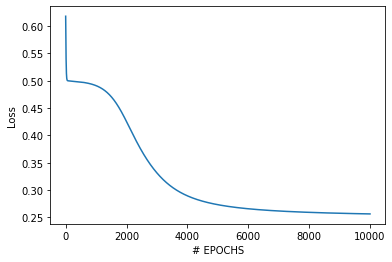

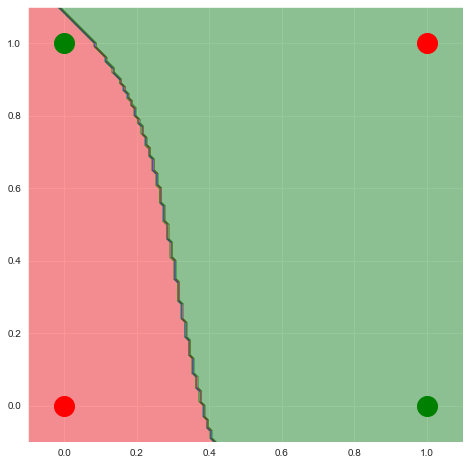

In [4]:
xor_mlp = MLP(train_data, target_xor, 0.1, 10000)
xor_mlp.train()
xor_mlp.plot()

In [5]:
for data_point in train_data:
    print(f"{data_point}:  {xor_mlp.predict(data_point)}")

[0 0]:  0
[0 1]:  1
[1 0]:  0
[1 1]:  1
